## embeddings creation

**dowlanding the dataset**

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zynicide/wine-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\julia\.cache\kagglehub\datasets\zynicide\wine-reviews\versions\4


**checking basic statistics and basic preprocessing**

In [11]:
import pandas as pd
df=pd.read_csv('winemag-data-130k-v2.csv')
df=df.dropna()
df.nunique()


Unnamed: 0               22387
country                      1
description              20491
designation               9515
points                      21
price                      146
province                     4
region_1                   171
region_2                    17
taster_name                 11
taster_twitter_handle       11
title                    20425
variety                    183
winery                    2791
dtype: int64

In [12]:
df.isnull().sum()


Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [13]:
# See the structure of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22387 entries, 4 to 129950
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22387 non-null  int64  
 1   country                22387 non-null  object 
 2   description            22387 non-null  object 
 3   designation            22387 non-null  object 
 4   points                 22387 non-null  int64  
 5   price                  22387 non-null  float64
 6   province               22387 non-null  object 
 7   region_1               22387 non-null  object 
 8   region_2               22387 non-null  object 
 9   taster_name            22387 non-null  object 
 10  taster_twitter_handle  22387 non-null  object 
 11  title                  22387 non-null  object 
 12  variety                22387 non-null  object 
 13  winery                 22387 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.6+ MB


In [14]:
df.describe()


,Unnamed: 0,points,price
count,22387.000000,22387.000000,22387.000000
mean,65656.944745,89.537812,41.465404
std,37566.725499,2.809306,29.379374
min,4.000000,80.000000,4.000000
25%,33404.000000,88.000000,25.000000
50%,66312.000000,90.000000,36.000000
75%,98460.500000,92.000000,50.000000
max,129950.000000,100.000000,2013.000000


In [15]:
text=df.description.tolist()

**actually starting on the embeddings**

In [16]:
from pathlib import Path
from typing import Any, Literal

import numpy as np
import pandas as pd
import torch
from PIL import Image
from numpy.typing import NDArray
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from transformers import AutoFeatureExtractor, AutoModel

In [17]:
import pandas as pd
from sentence_transformers import SentenceTransformer

df=pd.read_csv('winemag-data-130k-v2.csv')

df=df.dropna()
non_null_df = df[df['description'].notnull()]

model = SentenceTransformer("all-MiniLM-L6-v2")

descriptions = df['description'].tolist()
embeddings = model.encode(descriptions, batch_size=64, show_progress_bar=True)


Batches:   0%|          | 0/350 [00:00<?, ?it/s]

In [18]:
df['embedding'] = [embedding.tolist() for embedding in embeddings]


In [19]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,embedding
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[-0.03171934559941292, 0.061517998576164246, -..."
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,"[0.04914083704352379, -0.09198729693889618, -0..."
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,"[0.027928398922085762, -0.04427903890609741, -..."
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,"[0.034168776124715805, -0.08853653818368912, 0..."
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,"[-0.04409322142601013, -0.014005554839968681, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,"[0.003844498423859477, -0.06545169651508331, -..."
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,"[-0.01670747436583042, -0.06285125762224197, -..."
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,"[-0.013534042052924633, -0.062427934259176254,..."
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,"[0.04637950658798218, -0.0027538901194930077, ..."


In [20]:
non_null_df = df[df['embedding'].notnull()]

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)  

df['tsne_x'] = tsne_result[:, 0]
df['tsne_y'] = tsne_result[:, 1]


In [21]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,embedding,tsne_x,tsne_y
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[-0.03171934559941292, 0.061517998576164246, -...",15.493562,27.737259
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,"[0.04914083704352379, -0.09198729693889618, -0...",38.725460,-29.290331
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,"[0.027928398922085762, -0.04427903890609741, -...",-11.015038,-19.293209
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,"[0.034168776124715805, -0.08853653818368912, 0...",4.478123,79.834915
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,"[-0.04409322142601013, -0.014005554839968681, ...",-43.803661,11.291894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,"[0.003844498423859477, -0.06545169651508331, -...",58.951763,-19.923223
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,"[-0.01670747436583042, -0.06285125762224197, -...",17.137609,-52.090195
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,"[-0.013534042052924633, -0.062427934259176254,...",-29.821386,-61.355865
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,"[0.04637950658798218, -0.0027538901194930077, ...",46.231583,41.156818


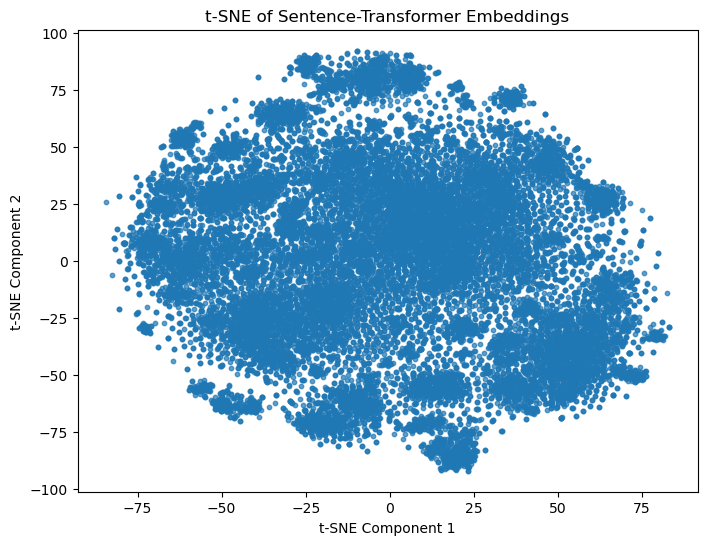

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['tsne_x'], df['tsne_y'], s=10, alpha=0.7)
plt.title('t-SNE of Sentence-Transformer Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [26]:
df_dropped = df.drop(columns=['embedding'])

df_dropped.to_csv("wine_data_emb_smaller.csv", index=False)

df_dropped


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tsne_x,tsne_y
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,15.493562,27.737259
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,38.725460,-29.290331
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,-11.015038,-19.293209
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,4.478123,79.834915
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,-43.803661,11.291894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,58.951763,-19.923223
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,17.137609,-52.090195
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,-29.821386,-61.355865
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,46.231583,41.156818
